In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing

from sklearn import tree

In [2]:
directory = "C:\\Users\\Michael\\Desktop\\CS 185C\\Malware\\"
cluster_folder = directory + "clustering\\"
max_samples = 53

In [3]:
def load_samples(file, max_lines):
    file = open(file, 'r')
    samples = []
    num_lines = 0;
    for line in file.readlines():
        if num_lines == max_lines:
            break;
        num_lines += 1
        numbers = np.array(list(map(lambda x : float(x), line.split(","))))
        samples.append(numbers)
    file.close()
    return np.array(samples)

In [4]:
def split_samples(array, split):
    return array[:,:split], array[:,split:]

In [5]:
def combine_all(array):
    temp = []
    for a in array:
        temp += list(a)
    return np.array(temp)

In [6]:
def round_scores(scores):
    return [int(round(num)) for num in scores]

In [7]:
def run_knn(train_x, train_y, test_x, num_families):
    knn = KNeighborsClassifier(n_neighbors=num_families, weights='distance')
    knn.fit(train_x, train_y)
    return knn.predict(train_x), knn.predict(test_x)

In [8]:
def run_kmeans(test_x, test_y,num_families):
    kmeans = KMeans(n_clusters=num_families, algorithm='auto', max_iter=20000, tol=1e-02)
    km_out = kmeans.fit_predict(test_x)
    print(km_out)
    return metrics.accuracy_score(test_y, round_scores(km_out))

In [9]:
def run_random_forest(train_x, train_y, test_x, n, default):
    if default == True:
        rf = RandomForestRegressor(n_estimators=n)
    else:
        rf = RandomForestRegressor(n_estimators=n, criterion='entropy', min_samples_split=10, min_samples_leaf=2)
    rf.fit(train_x, train_y)
    return rf.predict(train_x), rf.predict(test_x)


In [10]:
def run_random_forest_regressor(train_x, train_y, test_x, n, default):
    if default == True:
        rf = RandomForestClassifier(n_estimators=n)
    else:
        rf = RandomForestClassifier(n_estimators=n, min_samples_split=10, min_samples_leaf=2)
    rf.fit(train_x, train_y)
    #print(rf.predict(test_x))
    return rf.predict(train_x), rf.predict(test_x)


In [11]:
def subtract_lists(a, b):
    difference = []
    for element in a:
        if element not in b:
            difference.append(element)
    return difference

In [12]:
def get_samples(families_to_remove, features_to_remove):
    all_families = ["harebot", "cridex", "securityShield", "smarthdd", "zbot", "winwebsec", "zeroaccess"]
    families = subtract_lists(all_families, np.array(all_families)[families_to_remove])
    #families = list(set(all_families) - set(np.array(all_families)[families_to_remove]))
    #print(families)

    all_samples = []
    all_labels = []

    for family in families:
        all_samples.append(load_samples(cluster_folder +"input\\"+ family + " cluster.txt", max_samples))
    for i in range(len(families)):
        labels = np.arange(max_samples)
        #labels.fill(i - int(len(families)/2))
        labels.fill(i)
        all_labels.append(labels)

    all_samples = np.array(all_samples)
    if(features_to_remove != 0):
        all_samples = all_samples[::,::,:-features_to_remove]
    all_labels = np.array(all_labels)
    
    #print("shape: ", all_samples.shape)
    
    train_x, test_x = split_samples(all_samples, 42)
    train_x, test_x = combine_all(train_x), combine_all(test_x)

    train_y, test_y = split_samples(all_labels, 42)
    train_y, test_y = combine_all(train_y), combine_all(test_y)
    return train_x, train_y, test_x, test_y, len(families)

In [31]:
families_to_remove = []
train_x, train_y, test_x, test_y, num_families = get_samples(families_to_remove, 0)
x = []
y = []
print(num_families)
for i in range(10, 200,5):
    rf_pred = run_random_forest_regressor(train_x, train_y, test_x, i, True)#(train, test)
    knn_pred = run_knn(train_x, train_y, test_x, num_families)
    print(metrics.accuracy_score(test_y, rf_pred[1]))
    x.append(i)
    y.append(metrics.accuracy_score(test_y, rf_pred[1]))

7
0.7662337662337663
0.7662337662337663
0.7142857142857143
0.7532467532467533
0.7662337662337663
0.7922077922077922
0.7402597402597403
0.7272727272727273
0.7012987012987013
0.7142857142857143
0.7402597402597403
0.7532467532467533
0.7402597402597403
0.7402597402597403
0.7012987012987013
0.7402597402597403
0.7272727272727273
0.7142857142857143
0.7402597402597403
0.7272727272727273
0.7142857142857143
0.7272727272727273
0.7402597402597403
0.7272727272727273
0.7272727272727273
0.7402597402597403
0.7402597402597403
0.7792207792207793
0.7402597402597403
0.7142857142857143
0.7272727272727273
0.7012987012987013
0.7142857142857143
0.7142857142857143
0.7272727272727273
0.7402597402597403
0.7272727272727273
0.7402597402597403


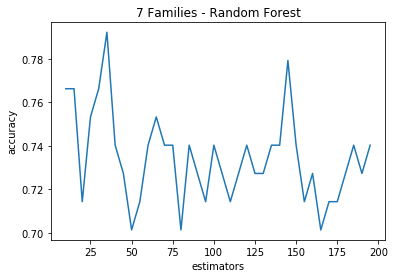

In [33]:
plt.plot(x, y)
plt.ylabel('accuracy')
plt.xlabel('estimators')
plt.title("{} Families - Random Forest".format(7))
plt.show()

In [35]:
families_to_remove = [1,0,2]
scores = [[], [], [], [], []]
for remove in range(len(families_to_remove)+1):
    for i in range(5):
        train_x, train_y, test_x, test_y, num_families = get_samples(families_to_remove, i)
        print(num_families)
        rf_pred = run_random_forest_regressor(train_x, train_y, test_x, 50, True)#(train, test)
        knn_pred = run_knn(train_x, train_y, test_x, num_families)
        score = metrics.accuracy_score(test_y, rf_pred[1])
        scores[i].append(score)
        print(7-i, metrics.accuracy_score(test_y, rf_pred[1]))
    families_to_remove.pop()

4
7 0.9772727272727273
4
6 0.9545454545454546
4
5 1.0
4
4 0.9772727272727273
4
3 0.9318181818181818
5
7 0.8727272727272727
5
6 0.8545454545454545
5
5 0.8727272727272727
5
4 0.8363636363636363
5
3 0.8181818181818182
6
7 0.8636363636363636
6
6 0.7878787878787878
6
5 0.8181818181818182
6
4 0.7878787878787878
6
3 0.7727272727272727
7
7 0.7532467532467533
7
6 0.7402597402597403
7
5 0.7402597402597403
7
4 0.7532467532467533
7
3 0.7142857142857143


IndexError: pop from empty list

In [36]:
i = 5
for score_set in scores:
    print(f"{i}&", end = "")
    [print("{:0.2f}\\%&".format(number*100), end="") for number in score_set]
    print()
    i -= 1

5&97.73\%&87.27\%&86.36\%&75.32\%&
4&95.45\%&85.45\%&78.79\%&74.03\%&
3&100.00\%&87.27\%&81.82\%&74.03\%&
2&97.73\%&83.64\%&78.79\%&75.32\%&
1&93.18\%&81.82\%&77.27\%&71.43\%&


In [37]:
test = 0
print(len(rf_pred), len(knn_pred))
for i in range(len(rf_pred[1])):
    print("{},{}".format(rf_pred[1][i],knn_pred[1][i]))

2 2
3,3
2,2
0,0
0,0
0,0
0,0
0,0
3,0
0,0
3,3
0,0
1,1
1,4
1,1
1,1
1,0
1,1
1,1
1,1
1,1
1,1
1,1
2,4
2,2
2,2
2,2
2,2
2,3
2,1
2,2
2,2
2,2
2,4
3,3
3,3
3,3
3,3
3,3
3,2
0,4
0,0
0,0
0,0
3,3
4,4
4,4
4,4
4,4
4,4
4,1
4,4
4,1
4,4
4,4
1,1


In [15]:
save_folder = cluster_folder
test = open(save_folder + "{} families test.txt".format(num_families), 'w')
train = open(save_folder + "{} families train.txt".format(num_families), 'w')

for i in range(len(rf_pred[0])):
    train.write(f"{rf_pred[0][i]},{knn_pred[0][i]}\n")
for i in range(len(rf_pred[1])):
    test.write(f"{rf_pred[1][i]},{knn_pred[1][i]}\n")

test.close()
train.close()


In [16]:
metrics.accuracy_score(test_y, rf_pred[1])

0.8333333333333334

In [459]:
def normalize(samples):
    transpose = np.transpose(samples)
    scaled_inputs = []
    for scores in transpose:
        scaled_inputs.append(preprocessing.scale(scores))
    return np.transpose(np.array(scaled_inputs))
test_x_normalized = normalize(test_x)
train_x_normalized = normalize(train_x)

In [466]:
print(run_kmeans(test_x, test_y, num_families))
print(test_y)

[4 5 5 0 5 1 0 5 2 0 4 6 4 3 3 3 0 6 0 0 0 0 5 5 5 5 5 0 3 1 5 3 5 3 6 0 5
 5 0 5 6 5 5 6 5 5 5 5 5 5 3 5 5 5 5 6 4 3 6 3 6 3 6 3 6 6 6 2 6 6 1 0 6 5
 6 0 5]
0.11688311688311688
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6
 6 6 6]


In [393]:
transpose = np.transpose(test_x_normalized)
print(transpose)

[[-0.62255264 -0.23872965  1.19012616  1.13007865  1.05035893 -1.0164265
  -0.62195131 -1.0850645  -1.07226467 -1.08970336 -1.09872337 -0.39507653
   0.44550269  1.70229104 -0.34361951  1.27070494 -0.65777364  1.58606174
  -0.71137829  1.62196998 -0.49043094 -0.55339922]
 [-0.92714988 -0.89784342 -0.86853696 -0.86853696 -0.86853696 -0.69269819
  -0.92714988 -0.69269819 -0.69269819 -0.69269819 -0.72200465  1.30014122
  -0.34102065  1.71043168  0.27441505  1.76904461  0.09857628  0.83123783
   1.3880606   0.59678613  1.85696399 -0.63408527]
 [-0.70660362 -0.63940188 -0.45485693 -0.45920921 -0.47071296 -0.88806993
  -0.71286164 -1.27515692 -0.91294343 -1.0103008  -1.2982752   1.83461915
   0.03761051  0.33395792  0.38873507  0.86475742  0.34200976  1.11745696
   1.92564338 -0.18233944  2.12210707  0.04383475]
 [-1.15545661 -1.10291798 -0.549924   -0.62613146 -0.62036494 -0.79182449
  -1.16145774 -0.99497145 -0.81169328 -0.92685929 -1.02521826  1.55492032
   0.48301885  0.60911653  0.30161

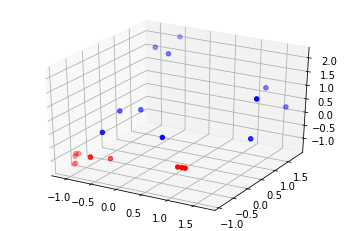

In [403]:
length = len(transpose[0])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transpose[0][:int(length/2)], transpose[1][:int(length/2)], transpose[2][:int(length/2)], color='r')
ax.scatter(transpose[0][int(length/2):], transpose[1][int(length/2):], transpose[2][int(length/2):], color='b')
plt.show()

In [352]:
dtr = tree.DecisionTreeRegressor()
dtr.fit(train_x, train_y)
dtr_pred = dtr.predict(test_x)
print(metrics.accuracy_score(test_y, dtr_pred))

0.8545454545454545


In [127]:
#deprecated
x = []
y = []
for i in range(10, 400, 10):
    rf = RandomForestClassifier(n_estimators=i, criterion='entropy', min_samples_split=10, min_samples_leaf=2)
    #rf = RandomForestClassifier(n_estimators=i)
    rf.fit(train_x, train_y)
    rf_pred = rf.predict(test_x)

    x.append(i)
    y.append(metrics.accuracy_score(test_y, rf_pred))

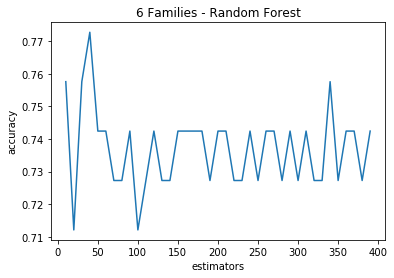

In [122]:
plt.plot(x, y)
plt.ylabel('accuracy')
plt.xlabel('estimators')
plt.title("{} Families - Random Forest".format(len(families)))
plt.show()

0.5194805194805194
